In [1]:
import os
import pickle
from fairchem.core.common.registry import registry
# from mp_api.client import MPRester
# from ase.io import read
from tqdm import tqdm
import torch
import numpy as np
import lmdb
from torch.utils.data import Subset
import torch
import matplotlib.pyplot as plt

In [4]:
path = '../data/SPICE/spice_separated/DES370K_Monomers/train'
path = '/data/ericqu/mptrj_fair/no_isolated_atoms_c12.0/train/train_mptrj.aselmdb'
dataset = registry.get_dataset_class("ase_db")({"src": path})
print(dataset[0])
# for point in dataset:
#     print(point.id)
#     print(point.sid)

Data(pos=[4, 3], cell=[1, 3, 3], atomic_numbers=[4], natoms=4, tags=[4], sid='mp-1006278-mp-1006287-0-0', fixed=[4], pbc=[3], fid=[1])


In [3]:
path = '../data/SPICE/spice_separated/DES370K_Monomers/test'
dataset = registry.get_dataset_class("lmdb")({"src": path})

In [4]:
force_norms = []
for datapoint in dataset:
    force_norms.append(datapoint.force.norm(dim=1).mean())

/home/ishan-amin/miniconda3/envs/fair-chem/lib/python3.12/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


In [5]:
force_norms = np.array(force_norms)
dist_errors = np.load('../gemnet_mono_dist_losses.npy')
undist_errors = np.load('../gemnet_mono_undist_losses.npy')
print(len(force_norms))
print(len(undist_errors))
print(np.mean(dist_errors))
print(np.mean(undist_errors))

889
889
0.006295393812585375
0.011135995324716262


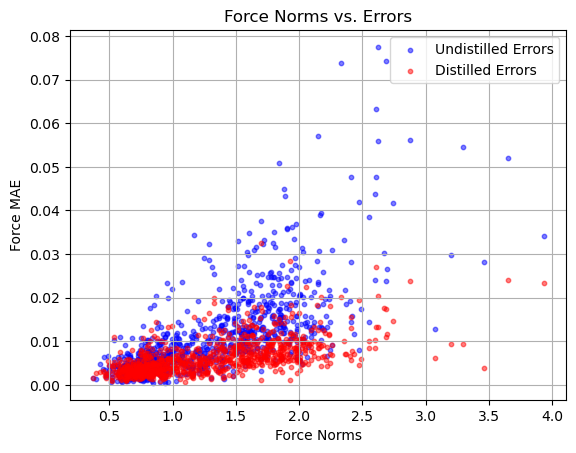

In [6]:
# Create a scatter plot
plt.scatter(force_norms, undist_errors, c='blue', alpha=0.5, s=10, label='Undistilled Errors')
plt.scatter(force_norms, dist_errors, c='red', alpha=0.5, s=10, label='Distilled Errors')

# Add labels, title, and legend
plt.ylabel('Force MAE')
plt.xlabel('Force Norms')
plt.title('Force Norms vs. Errors')
plt.legend()
# Display the plot
plt.grid(True)
plt.show()

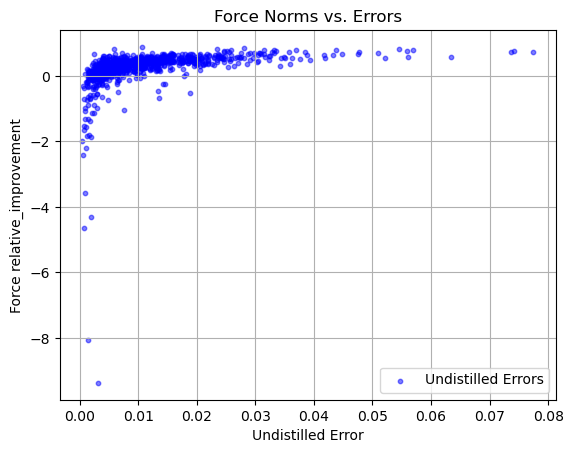

In [19]:
# Create a scatter plot
relative_improve = (undist_errors - dist_errors) / undist_errors
plt.scatter(undist_errors, relative_improve, c='blue', alpha=0.5, s=10, label='Undistilled Errors')

# Add labels, title, and legend
plt.xlabel('Undistilled Error')
plt.ylabel('Force relative_improvement')
plt.title('Force Norms vs. Errors')
# plt.ylim(-1, 1)
plt.legend()
# Display the plot
plt.grid(True)
plt.show()


In [ ]:
toby_path = '/data/shared/MLFF/SPICE/maceoff_split/test'

toby_spice_dataset = registry.get_dataset_class("lmdb")({"src": toby_path})
fairchem_dataset = registry.get_dataset_class("lmdb")({"src": toby_path})

# dataset_path = os.path.join(main_path)
# dataset = registry.get_dataset_class("ase_db")({"src": dataset_path, 'a2g_args': { 'r_energy': True, 'r_forces': True, 'r_stress': True}})
# a = dataset[0]
breakpoint()
print(fairchem_dataset[0])